In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import re
import contractions
import string
import nltk 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords,wordnet
from nltk.stem import WordNetLemmatizer
%matplotlib inline

In [4]:
#initializing SentimentIntensityAnalyzer() object
analyzer = SentimentIntensityAnalyzer()

In [5]:
df = pd.read_csv('vaderdata.csv',encoding = 'ISO-8859-1')

In [51]:
pd.set_option('display.max_colwidth',None)
df.head()

,Text,final_data,compound,neg,neu,pos,score,all_lower,nospace,tokenized,no_punct,sw_removed
0,"The residents of Hamilton court society, Gurgaon came together to fight against the constant negativity that is seeping #COVID19 The residents sang Gayatri... #GaytriMantraInGurgaon #CoronaVirus #ResidentsOfHamilton #IndiaFightsCovid_19 #GoCorona https://youtu.be/itBCSU9yDh8 pic.twitter.com/JzCxz0ctKH",The residents of Hamilton court society Gurgaon came together to fight against the constant negativity that is seeping The residents sang Gayatri,-0.7096,0.228,0.772,0.000,-1,the residents of hamilton court society gurgaon came together to fight against the constant negativity that is seeping the residents sang gayatri,The residents of Hamilton court society Gurgaon came together to fight against the constant negativity that is seeping The residents sang Gayatri,"[The, residents, of, Hamilton, court, society, Gurgaon, came, together, to, fight, against, the, constant, negativity, that, is, seeping, The, residents, sang, Gayatri]","[The, residents, of, Hamilton, court, society, Gurgaon, came, together, to, fight, against, the, constant, negativity, that, is, seeping, The, residents, sang, Gayatri]","[The, residents, Hamilton, court, society, Gurgaon, came, together, fight, constant, negativity, seeping, The, residents, sang, Gayatri]"
1,"@PMOIndia @narendramodi As a chest specialist doctor and responsible citizen, I would like to request you to please make arrangements towards #indiafightscovid-19 fund so that people like me could contribute in whatever capacity they can.!!",As a chest specialist doctor and responsible citizen I would like to request you to please make arrangements towards fund so that people like me could contribute in whatever capacity they can,0.8344,0.000,0.739,0.261,1,as a chest specialist doctor and responsible citizen i would like to request you to please make arrangements towards fund so that people like me could contribute in whatever capacity they can,As a chest specialist doctor and responsible citizen I would like to request you to please make arrangements towards fund so that people like me could contribute in whatever capacity they can,"[As, a, chest, specialist, doctor, and, responsible, citizen, I, would, like, to, request, you, to, please, make, arrangements, towards, fund, so, that, people, like, me, could, contribute, in, whatever, capacity, they, can]","[As, a, chest, specialist, doctor, and, responsible, citizen, I, would, like, to, request, you, to, please, make, arrangements, towards, fund, so, that, people, like, me, could, contribute, in, whatever, capacity, they, can]","[As, chest, specialist, doctor, responsible, citizen, I, would, like, request, please, make, arrangements, towards, fund, people, like, could, contribute, whatever, capacity]"
2,"Janta curfew is not new to #Kashmir, we already experienced it post 5th August 2019, let rest of India enjoy it amid breaking of Covid-19. #IndiaFightsCovid-19",Janta curfew is not new to we already experienced it post th August let rest of India enjoy it amid breaking of Covid,0.4939,0.000,0.873,0.127,1,janta curfew is not new to we already experienced it post th august let rest of india enjoy it amid breaking of covid,Janta curfew is not new to we already experienced it post th August let rest of India enjoy it amid breaking of Covid,"[Janta, curfew, is, not, new, to, we, already, experienced, it, post, th, August, let, rest, of, India, enjoy, it, amid, breaking, of, Covid]","[Janta, curfew, is, not, new, to, we, already, experienced, it, post, th, August, let, rest, of, India, enjoy, it, amid, breaking, of, Covid]","[Janta, curfew, new, already, experienced, post, th, August, let, rest, India, enjoy, amid, breaking, Covid]"
3,"The situation is getting worsen with every passing day. Please inform your friends, well-wishers not to panic. We can collectively fight against this Pandemic disease. Practice SOCIAL DISTANCING & keep yourself clean. Support o

In [7]:
df = df.drop('cleaned_data',axis=1)


In [8]:
df.head(10)

,Text,final_data
0,"The residents of Hamilton court society, Gurgaon came together to fight against the constant negativity that is seeping #COVID19 The residents sang Gayatri... #GaytriMantraInGurgaon #CoronaVirus #ResidentsOfHamilton #IndiaFightsCovid_19 #GoCorona https://youtu.be/itBCSU9yDh8 pic.twitter.com/JzCxz0ctKH",The residents of Hamilton court society Gurgaon came together to fight against the constant negativity that is seeping The residents sang Gayatri
1,"@PMOIndia @narendramodi As a chest specialist doctor and responsible citizen, I would like to request you to please make arrangements towards #indiafightscovid-19 fund so that people like me could contribute in whatever capacity they can.!!",As a chest specialist doctor and responsible citizen I would like to request you to please make arrangements towards fund so that people like me could contribute in whatever capacity they can
2,"Janta curfew is not new to #Kashmir, we already experienced it post 5th August 2019, let rest of India enjoy it amid breaking of Covid-19. #IndiaFightsCovid-19",Janta curfew is not new to we already experienced it post th August let rest of India enjoy it amid breaking of Covid
3,"The situation is getting worsen with every passing day. Please inform your friends, well-wishers not to panic. We can collectively fight against this Pandemic disease. Practice SOCIAL DISTANCING & keep yourself clean. Support our PM. #JantaCurfew Success #IndiaFightsCovid-19",The situation is getting worsen with every passing day Please inform your friends well-wishers not to panic We can collectively fight against this Pandemic disease Practice SOCIAL DISTANCING & keep yourself clean Support our PM Success
4,"@narendramodi @PMOIndia Janta curfew is not new to Kashmir, we already experienced it post 5th August 2019, let rest of India enjoy it amid breaking of Covid-19. #IndiaFightsCovid-19",Janta curfew is not new to Kashmir we already experienced it post th August let rest of India enjoy it amid breaking of Covid
5,"Lets all participate in the ""JANATA CURFEW"" by staying inside our Homes from 7:00 AM to 9:00 PM on 22nd March, 2020. #IndiaFightsCOVID_19 pic.twitter.com/0lcXqiRMXf",Lets all participate in the JANATA CURFEW by staying inside our Homes from AM to PM on nd March
6,"Closed for Saturday and Sunday Deepika sales Katora talba,near PNB bank. Raipur #IndiafightsCovid-19 #TitanfightsCovid-19 @Raipur https://www.instagram.com/p/B9_HA5bDudL/?igshid=50jqwcixsrt4",Closed for Saturday and Sunday Deepika sales Katora talba near PNB bank Raipur
7,Gratitude towards our protectors @PMOIndia @narendramodi @AmitShah @nitin_gadkari #Coronafighters #Salesforcians #IndiaFightsCorona #IndiaFightsCOVID-19 #PrayersForCoronapic.twitter.com/ojPSyUHwPj,Gratitude towards our protectors
8,#IndiaFightsCOVID-19 #ThankyouAllHealthWorkers #thanksgiving to all who are selflessly helping us in our fight against COVID19. #SocialDistancing #SelfQuarantine #NoPanicBuying https://www.instagram.com/p/B-CUPqbDM4s/?igshid=17ptvsrwfdx40,to all who are selflessly helping us in our fight against COVID
9,"InshaAllah #JantaCurfew will help against the spread of virus, though we may have to do this again. The clapping brought so much cheer. So a reminder of safeguards, with some cheer... Pls take it in the right spirit. To all relentlessly working today - Extremely Grateful. Thx!",InshaAllah will help against the spread of virus though we may have to do this again The clapping brought so much cheer So a reminder of safeguards with some cheer Pls take it in the right spirit To all relentlessly working today - Extremely Grateful Thx


In [9]:
df['compound'] = [analyzer.polarity_scores(str(v))['compound'] for v in df['final_data']]
df['neg'] = [analyzer.polarity_scores(str(v))['neg'] for v in df['final_data']]
df['neu'] = [analyzer.polarity_scores(str(v))['neu'] for v in df['final_data']]
df['pos'] = [analyzer.polarity_scores(str(v))['pos'] for v in df['final_data']]

In [10]:
#applying VADER sentiment analysis on cleaned dataset
def sentiment_analyser_scores(text):
    score = analyzer.polarity_scores(str(text))
    f = score['compound']
    if f >= 0.05:
        return 1
    elif (f>-0.05) and (f<0.05):
        return 0 
    else:
        return -1
df['score'] = df.final_data.apply(sentiment_analyser_scores)

We need only the values ranging within -1,0,1 for further analysis. The other sentiment scores obtained will be used for further visualizations in the dashboard.

In [11]:
df.head(25)

,Text,final_data,compound,neg,neu,pos,score
0,"The residents of Hamilton court society, Gurgaon came together to fight against the constant negativity that is seeping #COVID19 The residents sang Gayatri... #GaytriMantraInGurgaon #CoronaVirus #ResidentsOfHamilton #IndiaFightsCovid_19 #GoCorona https://youtu.be/itBCSU9yDh8 pic.twitter.com/JzCxz0ctKH",The residents of Hamilton court society Gurgaon came together to fight against the constant negativity that is seeping The residents sang Gayatri,-0.7096,0.228,0.772,0.000,-1
1,"@PMOIndia @narendramodi As a chest specialist doctor and responsible citizen, I would like to request you to please make arrangements towards #indiafightscovid-19 fund so that people like me could contribute in whatever capacity they can.!!",As a chest specialist doctor and responsible citizen I would like to request you to please make arrangements towards fund so that people like me could contribute in whatever capacity they can,0.8344,0.000,0.739,0.261,1
2,"Janta curfew is not new to #Kashmir, we already experienced it post 5th August 2019, let rest of India enjoy it amid breaking of Covid-19. #IndiaFightsCovid-19",Janta curfew is not new to we already experienced it post th August let rest of India enjoy it amid breaking of Covid,0.4939,0.000,0.873,0.127,1
3,"The situation is getting worsen with every passing day. Please inform your friends, well-wishers not to panic. We can collectively fight against this Pandemic disease. Practice SOCIAL DISTANCING & keep yourself clean. Support our PM. #JantaCurfew Success #IndiaFightsCovid-19",The situation is getting worsen with every passing day Please inform your friends well-wishers not to panic We can collectively fight against this Pandemic disease Practice SOCIAL DISTANCING & keep yourself clean Support our PM Success,0.8834,0.115,0.548,0.337,1
4,"@narendramodi @PMOIndia Janta curfew is not new to Kashmir, we already experienced it post 5th August 2019, let rest of India enjoy it amid breaking of Covid-19. #IndiaFightsCovid-19",Janta curfew is not new to Kashmir we already experienced it post th August let rest of India enjoy it amid breaking of Covid,0.4939,0.000,0.878,0.122,1
5,"Lets all participate in the ""JANATA CURFEW"" by staying inside our Homes from 7:00 AM to 9:00 PM on 22nd March, 2020. #IndiaFightsCOVID_19 pic.twitter.com/0lcXqiRMXf",Lets all participate in the JANATA CURFEW by staying inside our Homes from AM to PM on nd March,0.0000,0.000,1.000,0.000,0
6,"Closed for Saturday and Sunday Deepika sales Katora talba,near PNB bank. Raipur #IndiafightsCovid-19 #TitanfightsCovid-19 @Raipur https://www.instagram.com/p/B9_HA5bDudL/?igshid=50jqwcixsrt4",Closed for Saturday and Sunday Deepika sales Katora talba near PNB bank Raipur,0.0000,0.000,1.000,0.000,0
7,Gratitude towards our protectors @PMOIndia @narendramodi @AmitShah @nitin_gadkari #Coronafighters #Salesforcians #IndiaFightsCorona #IndiaFightsCOVID-19 #PrayersForCoronapic.twitter.com/ojPSyUHwPj,Gratitude towards our protectors,0.5106,0.000,0.476,0.524,1
8,#IndiaFightsCOVID-19 #ThankyouAllHealthWorkers #thanksgiving to all who are selflessly helping us in our fight against COVID19. #SocialDistancing #SelfQuarantine #NoPanicBuying https://www.instagram.com/p/B-CUPqbDM4s/?igshid=17ptvsrwfdx40,to all who are selflessly helping us in our fight against COVID,-0.1027,0.176,0.676,0.149,-1
9,"InshaAllah #JantaCurfew will help against the spread of virus, though we may have to do this again. The clapping brought so much cheer. So a reminder of safeguards, with some cheer... Pls take it in the right spirit. To all relentlessly working today - Extremely Grateful. Thx!",InshaAllah will help against the spread of virus though we may have to do this again The clapping brought so much cheer So a reminder of safeguards with some cheer Pls take it in the right spirit To all relentlessly working today - Extremely Grateful Thx,0.9587,0.000,0.644,0.356,1


In [12]:
df.to_csv('vaderdataviz.csv')

In [13]:
df.drop(['pos','neu','neg','compound'],axis=1)

,Text,final_data,score
0,"The residents of Hamilton court society, Gurgaon came together to fight against the constant negativity that is seeping #COVID19 The residents sang Gayatri... #GaytriMantraInGurgaon #CoronaVirus #ResidentsOfHamilton #IndiaFightsCovid_19 #GoCorona https://youtu.be/itBCSU9yDh8 pic.twitter.com/JzCxz0ctKH",The residents of Hamilton court society Gurgaon came together to fight against the constant negativity that is seeping The residents sang Gayatri,-1
1,"@PMOIndia @narendramodi As a chest specialist doctor and responsible citizen, I would like to request you to please make arrangements towards #indiafightscovid-19 fund so that people like me could contribute in whatever capacity they can.!!",As a chest specialist doctor and responsible citizen I would like to request you to please make arrangements towards fund so that people like me could contribute in whatever capacity they can,1
2,"Janta curfew is not new to #Kashmir, we already experienced it post 5th August 2019, let rest of India enjoy it amid breaking of Covid-19. #IndiaFightsCovid-19",Janta curfew is not new to we already experienced it post th August let rest of India enjoy it amid breaking of Covid,1
3,"The situation is getting worsen with every passing day. Please inform your friends, well-wishers not to panic. We can collectively fight against this Pandemic disease. Practice SOCIAL DISTANCING & keep yourself clean. Support our PM. #JantaCurfew Success #IndiaFightsCovid-19",The situation is getting worsen with every passing day Please inform your friends well-wishers not to panic We can collectively fight against this Pandemic disease Practice SOCIAL DISTANCING & keep yourself clean Support our PM Success,1
4,"@narendramodi @PMOIndia Janta curfew is not new to Kashmir, we already experienced it post 5th August 2019, let rest of India enjoy it amid breaking of Covid-19. #IndiaFightsCovid-19",Janta curfew is not new to Kashmir we already experienced it post th August let rest of India enjoy it amid breaking of Covid,1
...,...,...,...
25413,Manipur govt to provide compensation to media persons affected by Covid 19 #Imphal #Coronavirusindia #COVID19 #COVID19India #CoronaVirus #COVID19outbreak #IndiaFightsCoronavirus #CoronavirusPandemic #StayHomehttps://bit.ly/2Aqb9WX,Manipur govt to provide compensation to media persons affected by Covid,-1
25414,@ayushmannk @SonuSood @BeingSalmanKhan @ABPNews please help this guy #CoronaWarriors #CoronavirusIndia #COVID19Indiahttps://twitter.com/asmitatripathi7/status/1264590444463357958,please help this guy,1
25415,23 new cases takes Assam COVID tally to 1384 #Guwahati #Coronavirusindia #COVID19 #COVID19India #CoronaVirus #COVID19outbreak #IndiaFightsCoronavirus #CoronavirusPandemic #StayHomehttps://bit.ly/3drjTdK,new cases takes Assam COVID tally to,0
25416,"#CoronavirusIndia Cases June 1st, 10:00 PM IST Today's cases - 7,600 (Yesterday, being Sunday only 100K Tests were done in India, compared to 125K.. So Cases are low today) Total cases - 198,200",Cases June st PM IST Today's cases - (Yesterday being Sunday only K Tests were done in India compared to K So Cases are low today) Total cases -,-1


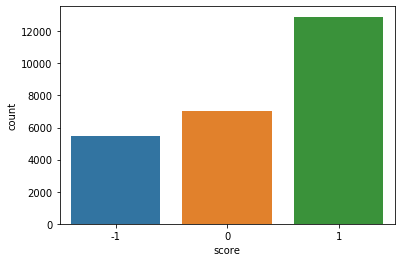

In [14]:
sns.countplot(x='score',data=df)
plt.show()

In [15]:
#converting text to lower case
df['all_lower'] = df['final_data'].apply(lambda x: str(x).lower())

In [16]:
#removing whitespaces
def rem_whitespaces(text):
    text = re.sub('\s+',' ',str(text),flags=re.MULTILINE)
    return text 
df['nospace'] = df['final_data'].apply(rem_whitespaces)

In [17]:
#removing contractions
df['no_contract'] = df['nospace'].apply(lambda x : [contractions.fix(word) for word in x.split()])


In [18]:
df['nospace'] = [' '.join(map(str,i)) for i in df['no_contract']]
df.head(10)

,Text,final_data,compound,neg,neu,pos,score,all_lower,nospace,no_contract
0,"The residents of Hamilton court society, Gurgaon came together to fight against the constant negativity that is seeping #COVID19 The residents sang Gayatri... #GaytriMantraInGurgaon #CoronaVirus #ResidentsOfHamilton #IndiaFightsCovid_19 #GoCorona https://youtu.be/itBCSU9yDh8 pic.twitter.com/JzCxz0ctKH",The residents of Hamilton court society Gurgaon came together to fight against the constant negativity that is seeping The residents sang Gayatri,-0.7096,0.228,0.772,0.000,-1,the residents of hamilton court society gurgaon came together to fight against the constant negativity that is seeping the residents sang gayatri,The residents of Hamilton court society Gurgaon came together to fight against the constant negativity that is seeping The residents sang Gayatri,"[The, residents, of, Hamilton, court, society, Gurgaon, came, together, to, fight, against, the, constant, negativity, that, is, seeping, The, residents, sang, Gayatri]"
1,"@PMOIndia @narendramodi As a chest specialist doctor and responsible citizen, I would like to request you to please make arrangements towards #indiafightscovid-19 fund so that people like me could contribute in whatever capacity they can.!!",As a chest specialist doctor and responsible citizen I would like to request you to please make arrangements towards fund so that people like me could contribute in whatever capacity they can,0.8344,0.000,0.739,0.261,1,as a chest specialist doctor and responsible citizen i would like to request you to please make arrangements towards fund so that people like me could contribute in whatever capacity they can,As a chest specialist doctor and responsible citizen I would like to request you to please make arrangements towards fund so that people like me could contribute in whatever capacity they can,"[As, a, chest, specialist, doctor, and, responsible, citizen, I, would, like, to, request, you, to, please, make, arrangements, towards, fund, so, that, people, like, me, could, contribute, in, whatever, capacity, they, can]"
2,"Janta curfew is not new to #Kashmir, we already experienced it post 5th August 2019, let rest of India enjoy it amid breaking of Covid-19. #IndiaFightsCovid-19",Janta curfew is not new to we already experienced it post th August let rest of India enjoy it amid breaking of Covid,0.4939,0.000,0.873,0.127,1,janta curfew is not new to we already experienced it post th august let rest of india enjoy it amid breaking of covid,Janta curfew is not new to we already experienced it post th August let rest of India enjoy it amid breaking of Covid,"[Janta, curfew, is, not, new, to, we, already, experienced, it, post, th, August, let, rest, of, India, enjoy, it, amid, breaking, of, Covid]"
3,"The situation is getting worsen with every passing day. Please inform your friends, well-wishers not to panic. We can collectively fight against this Pandemic disease. Practice SOCIAL DISTANCING & keep yourself clean. Support our PM. #JantaCurfew Success #IndiaFightsCovid-19",The situation is getting worsen with every passing day Please inform your friends well-wishers not to panic We can collectively fight against this Pandemic disease Practice SOCIAL DISTANCING & keep yourself clean Support our PM Success,0.8834,0.115,0.548,0.337,1,the situation is getting worsen with every passing day please inform your friends well-wishers not to panic we can collectively fight against this pandemic disease practice social distancing & keep yourself clean support our pm success,The situation is getting worsen with every passing day Please inform your friends well-wishers not to panic We can collectively fight against this Pandemic disease Practice SOCIAL DISTANCING & keep yourself clean Support our PM Success,"[The, situation, is, getting, worsen, with, every, passing, day, Please, inform, your, friends, well-wishers, not, to, panic, We, can, collectively, fight, against, this, Pandemic, disease, Practice, S

In [19]:
df = df.drop('no_contract',axis=1)

In [20]:
#tokenizing words
df['tokenized'] = df['nospace'].apply(word_tokenize)
df.head(50)

,Text,final_data,compound,neg,neu,pos,score,all_lower,nospace,tokenized
0,"The residents of Hamilton court society, Gurgaon came together to fight against the constant negativity that is seeping #COVID19 The residents sang Gayatri... #GaytriMantraInGurgaon #CoronaVirus #ResidentsOfHamilton #IndiaFightsCovid_19 #GoCorona https://youtu.be/itBCSU9yDh8 pic.twitter.com/JzCxz0ctKH",The residents of Hamilton court society Gurgaon came together to fight against the constant negativity that is seeping The residents sang Gayatri,-0.7096,0.228,0.772,0.000,-1,the residents of hamilton court society gurgaon came together to fight against the constant negativity that is seeping the residents sang gayatri,The residents of Hamilton court society Gurgaon came together to fight against the constant negativity that is seeping The residents sang Gayatri,"[The, residents, of, Hamilton, court, society, Gurgaon, came, together, to, fight, against, the, constant, negativity, that, is, seeping, The, residents, sang, Gayatri]"
1,"@PMOIndia @narendramodi As a chest specialist doctor and responsible citizen, I would like to request you to please make arrangements towards #indiafightscovid-19 fund so that people like me could contribute in whatever capacity they can.!!",As a chest specialist doctor and responsible citizen I would like to request you to please make arrangements towards fund so that people like me could contribute in whatever capacity they can,0.8344,0.000,0.739,0.261,1,as a chest specialist doctor and responsible citizen i would like to request you to please make arrangements towards fund so that people like me could contribute in whatever capacity they can,As a chest specialist doctor and responsible citizen I would like to request you to please make arrangements towards fund so that people like me could contribute in whatever capacity they can,"[As, a, chest, specialist, doctor, and, responsible, citizen, I, would, like, to, request, you, to, please, make, arrangements, towards, fund, so, that, people, like, me, could, contribute, in, whatever, capacity, they, can]"
2,"Janta curfew is not new to #Kashmir, we already experienced it post 5th August 2019, let rest of India enjoy it amid breaking of Covid-19. #IndiaFightsCovid-19",Janta curfew is not new to we already experienced it post th August let rest of India enjoy it amid breaking of Covid,0.4939,0.000,0.873,0.127,1,janta curfew is not new to we already experienced it post th august let rest of india enjoy it amid breaking of covid,Janta curfew is not new to we already experienced it post th August let rest of India enjoy it amid breaking of Covid,"[Janta, curfew, is, not, new, to, we, already, experienced, it, post, th, August, let, rest, of, India, enjoy, it, amid, breaking, of, Covid]"
3,"The situation is getting worsen with every passing day. Please inform your friends, well-wishers not to panic. We can collectively fight against this Pandemic disease. Practice SOCIAL DISTANCING & keep yourself clean. Support our PM. #JantaCurfew Success #IndiaFightsCovid-19",The situation is getting worsen with every passing day Please inform your friends well-wishers not to panic We can collectively fight against this Pandemic disease Practice SOCIAL DISTANCING & keep yourself clean Support our PM Success,0.8834,0.115,0.548,0.337,1,the situation is getting worsen with every passing day please inform your friends well-wishers not to panic we can collectively fight against this pandemic disease practice social distancing & keep yourself clean support our pm success,The situation is getting worsen with every passing day Please inform your friends well-wishers not to panic We can collectively fight against this Pandemic disease Practice SOCIAL DISTANCING & keep yourself clean Support our PM Success,"[The, situation, is, getting, worsen, with, every, passing, day, Please, inform, your, friends, well-wishers, not, to, panic, We, can, collectively, fight, against, this, Pandemic, disease, Practice, SOC

In [21]:
#removing punctuations
punc = string.punctuation
df['no_punct'] = df['tokenized'].apply(lambda x:[word for word in x if word not in punc])

In [22]:
#removing stopwords
stop_words = set(stopwords.words('english'))
df['sw_removed'] = df['no_punct'].apply(lambda x:[word for word in x if word not in stop_words])

In [23]:
df.head(25)

,Text,final_data,compound,neg,neu,pos,score,all_lower,nospace,tokenized,no_punct,sw_removed
0,"The residents of Hamilton court society, Gurgaon came together to fight against the constant negativity that is seeping #COVID19 The residents sang Gayatri... #GaytriMantraInGurgaon #CoronaVirus #ResidentsOfHamilton #IndiaFightsCovid_19 #GoCorona https://youtu.be/itBCSU9yDh8 pic.twitter.com/JzCxz0ctKH",The residents of Hamilton court society Gurgaon came together to fight against the constant negativity that is seeping The residents sang Gayatri,-0.7096,0.228,0.772,0.000,-1,the residents of hamilton court society gurgaon came together to fight against the constant negativity that is seeping the residents sang gayatri,The residents of Hamilton court society Gurgaon came together to fight against the constant negativity that is seeping The residents sang Gayatri,"[The, residents, of, Hamilton, court, society, Gurgaon, came, together, to, fight, against, the, constant, negativity, that, is, seeping, The, residents, sang, Gayatri]","[The, residents, of, Hamilton, court, society, Gurgaon, came, together, to, fight, against, the, constant, negativity, that, is, seeping, The, residents, sang, Gayatri]","[The, residents, Hamilton, court, society, Gurgaon, came, together, fight, constant, negativity, seeping, The, residents, sang, Gayatri]"
1,"@PMOIndia @narendramodi As a chest specialist doctor and responsible citizen, I would like to request you to please make arrangements towards #indiafightscovid-19 fund so that people like me could contribute in whatever capacity they can.!!",As a chest specialist doctor and responsible citizen I would like to request you to please make arrangements towards fund so that people like me could contribute in whatever capacity they can,0.8344,0.000,0.739,0.261,1,as a chest specialist doctor and responsible citizen i would like to request you to please make arrangements towards fund so that people like me could contribute in whatever capacity they can,As a chest specialist doctor and responsible citizen I would like to request you to please make arrangements towards fund so that people like me could contribute in whatever capacity they can,"[As, a, chest, specialist, doctor, and, responsible, citizen, I, would, like, to, request, you, to, please, make, arrangements, towards, fund, so, that, people, like, me, could, contribute, in, whatever, capacity, they, can]","[As, a, chest, specialist, doctor, and, responsible, citizen, I, would, like, to, request, you, to, please, make, arrangements, towards, fund, so, that, people, like, me, could, contribute, in, whatever, capacity, they, can]","[As, chest, specialist, doctor, responsible, citizen, I, would, like, request, please, make, arrangements, towards, fund, people, like, could, contribute, whatever, capacity]"
2,"Janta curfew is not new to #Kashmir, we already experienced it post 5th August 2019, let rest of India enjoy it amid breaking of Covid-19. #IndiaFightsCovid-19",Janta curfew is not new to we already experienced it post th August let rest of India enjoy it amid breaking of Covid,0.4939,0.000,0.873,0.127,1,janta curfew is not new to we already experienced it post th august let rest of india enjoy it amid breaking of covid,Janta curfew is not new to we already experienced it post th August let rest of India enjoy it amid breaking of Covid,"[Janta, curfew, is, not, new, to, we, already, experienced, it, post, th, August, let, rest, of, India, enjoy, it, amid, breaking, of, Covid]","[Janta, curfew, is, not, new, to, we, already, experienced, it, post, th, August, let, rest, of, India, enjoy, it, amid, breaking, of, Covid]","[Janta, curfew, new, already, experienced, post, th, August, let, rest, India, enjoy, amid, breaking, Covid]"
3,"The situation is getting worsen with every passing day. Please inform your friends, well-wishers not to panic. We can collectively fight against this Pandemic disease. Practice SOCIAL DISTANCING & keep yourself clean. Support o

# Applying machine learning algorithms on data

**Using MultiNomial Naive Bayes with CountVectorizer**

In [24]:

from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB())])
tuned_parameters = {
    'vect__ngram_range': [(1, 1), (1, 2)],
    'tfidf__use_idf': (True, False),
    'tfidf__norm': ('l1', 'l2'),
    'clf__alpha': [1, 1e-1, 1e-2]
}

In [25]:
#splitting into training and test datasets
x = df['nospace']
y = df['score']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=42)

In [26]:
#cross validation and parameter tuning
clf = GridSearchCV(text_clf, tuned_parameters, cv=10, scoring=None)
clf.fit(x_train, y_train)
pred = clf.predict(x_test)

print(classification_report(y_test,pred, digits=4))

              precision    recall  f1-score   support

          -1     0.6540    0.4873    0.5585      1808
           0     0.7533    0.4503    0.5636      2312
           1     0.6786    0.8997    0.7736      4268

    accuracy                         0.6869      8388
   macro avg     0.6953    0.6124    0.6319      8388
weighted avg     0.6939    0.6869    0.6694      8388



**Using Logistic Regression with TfidfVectorizer**

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
log_reg = LogisticRegression()


In [59]:
#initializing TfidfVectorizer object
vect_word = TfidfVectorizer(max_features=20000, lowercase=True, analyzer='word',
                        stop_words= 'english',ngram_range=(1,2),dtype=np.float32)

In [60]:
# Word ngram vector
tr_vect = vect_word.fit_transform(x_train)
ts_vect = vect_word.transform(x_test)

In [61]:
#cross validation and parameter tuning
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(max_iter=500), param_grid, cv=10)
grid.fit(tr_vect, y_train)

print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)


Best cross-validation score: 0.79
Best parameters:  {'C': 10}
Best estimator:  LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [64]:
lr = grid.best_estimator_
pred = lr.predict(ts_vect)

In [63]:
print(classification_report(y_test, pred, digits=4))

              precision    recall  f1-score   support

          -1     0.7461    0.6405    0.6893      1808
           0     0.7395    0.7958    0.7667      2312
           1     0.8466    0.8625    0.8545      4268

    accuracy                         0.7963      8388
   macro avg     0.7774    0.7663    0.7701      8388
weighted avg     0.7954    0.7963    0.7947      8388



**Using Logistic Regression with CountVectorizer**

In [34]:
#initializing vectorizer object and transforming train and test datasets
count_vect = CountVectorizer(binary=True, ngram_range=(1, 2))
ct_vect = count_vect.fit_transform(x_train)
cs_vect = count_vect.transform(x_test)

In [65]:
#cross validation and parameter tuning
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(max_iter=500), param_grid, cv=10)
grid.fit(ct_vect, y_train)

print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)

KeyboardInterrupt: 

In [ ]:
lr = grid.best_estimator_
pred = lr.predict(cs_vect)

In [ ]:
print(classification_report(y_test, pred, digits=4))

**Using Support Vector Machine paired with TfidfVectorizer**

In [38]:
from sklearn.svm import LinearSVC

In [39]:
for c in [0.01, 0.05, 0.25, 0.5, 1,1.05,1.25,1.5,1.75,2]:
    
    svm = LinearSVC(C=c)
    svm.fit(tr_vect, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_test, svm.predict(ts_vect))))

Accuracy for C=0.01: 0.5482832618025751
Accuracy for C=0.05: 0.7246065808297568
Accuracy for C=0.25: 0.797448736289938
Accuracy for C=0.5: 0.800071530758226
Accuracy for C=1: 0.7997138769670958
Accuracy for C=1.05: 0.798760133524082
Accuracy for C=1.25: 0.7986409155937053
Accuracy for C=1.5: 0.7995946590367191
Accuracy for C=1.75: 0.7993562231759657
Accuracy for C=2: 0.7984024797329519


In [40]:
final_svm_ngram = LinearSVC(C=0.5)
final_svm_ngram.fit(tr_vect,y_train)
print ("Final Accuracy: %s" 
       % accuracy_score(y_test, final_svm_ngram.predict(ts_vect)))

Final Accuracy: 0.800071530758226


In [41]:
print(classification_report(y_test,final_svm_ngram.predict(ts_vect),digits=4))

              precision    recall  f1-score   support

          -1     0.7760    0.6305    0.6958      1808
           0     0.7366    0.7984    0.7663      2312
           1     0.8441    0.8728    0.8582      4268

    accuracy                         0.8001      8388
   macro avg     0.7856    0.7672    0.7734      8388
weighted avg     0.7998    0.8001    0.7979      8388



**Using Support Vector Machine paired with CountVectorizer**

In [42]:
from sklearn.feature_extraction.text import CountVectorizer


In [43]:
ngram_vectorizer = CountVectorizer(binary=True, ngram_range=(1, 2))
tr_vector = ngram_vectorizer.fit_transform(x_train)
ts_vector= ngram_vectorizer.transform(x_test)

for c in [0.01, 0.05, 0.25, 0.5, 1,1.05,1.25,1.5,1.75,2,2.25,2.5,2.75,3]:
    svm = LinearSVC(C=c,dual=False)
    svm.fit(tr_vector, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_test, svm.predict(ts_vector))))
    

Accuracy for C=0.01: 0.7744396757272294
Accuracy for C=0.05: 0.801859799713877
Accuracy for C=0.25: 0.8081783500238436
Accuracy for C=0.5: 0.8106819265617549
Accuracy for C=1: 0.8133047210300429
Accuracy for C=1.05: 0.8134239389604196
Accuracy for C=1.25: 0.8133047210300429
Accuracy for C=1.5: 0.8125894134477826
Accuracy for C=1.75: 0.8122317596566524
Accuracy for C=2: 0.8116356700047688
Accuracy for C=2.25: 0.8104434907010014
Accuracy for C=2.5: 0.8111587982832618
Accuracy for C=2.75: 0.8104434907010014
Accuracy for C=3: 0.8103242727706247


In [48]:
final_svm_ngram = LinearSVC(C=1.05,dual=False)
final_svm_ngram.fit(tr_vector, y_train)
print ("Final Accuracy: %s" 
       % accuracy_score(y_test, final_svm_ngram.predict(ts_vector)))

Final Accuracy: 0.8134239389604196


In [49]:
print(classification_report(y_test,final_svm_ngram.predict(ts_vector),digits=4))

              precision    recall  f1-score   support

          -1     0.7819    0.6106    0.6857      1808
           0     0.7260    0.8914    0.8002      2312
           1     0.8842    0.8571    0.8704      4268

    accuracy                         0.8134      8388
   macro avg     0.7973    0.7864    0.7855      8388
weighted avg     0.8185    0.8134    0.8113      8388

